# THE SPARKS FOUNDATION


#TASK 3 Exploratory Data Analysis - Retail
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
As a business manager, try to find out the weak areas where you can
work to make more profit.

# Author :- Korthiwada Sai Shiva




In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-1 :- Reading the Dataset

In [3]:
store_data=pd.read_csv("SampleSuperstore.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store_data.shape

(9994, 13)

In [5]:
store_data.info

<bound method DataFrame.info of            Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994 r

In [7]:
store_data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


This dataset is given for 3 segments of people & there are 4 types of shipping mode that we are going to examine

# Univariate Analysis

In [10]:
store_data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
store_data['Segment'].value_counts()/len(store_data['Segment'])*100

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

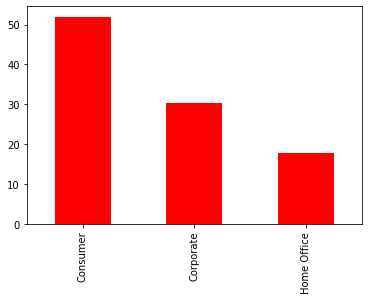

In [12]:
Segment_graph=(store_data['Segment'].value_counts()/len(store_data['Segment'])*100).plot(kind='bar',color='r')

In [14]:
store_data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [15]:
Ship_graph = (store_data['Ship Mode'].value_counts())/len(store_data['Ship Mode'])*100

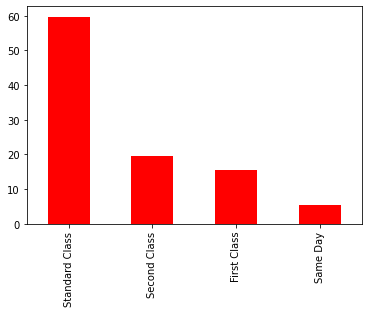

In [20]:
Ship_graph.plot(kind="bar",color="red")

A Very less % of deliveries were made on the same day while Most of the deliveries belong to the Standard Class(Around 60%). Also 10-20% of deliveries belong to First and Second Class

In [22]:
Category_graph=store_data['Category'].value_counts()

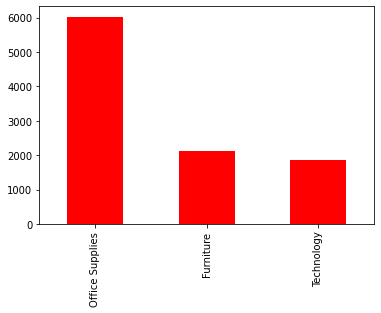

In [24]:
Category_graph.plot(kind="bar",color="red")

# Analysis using Pairplot of each column

#  [1] Based on the Catagory

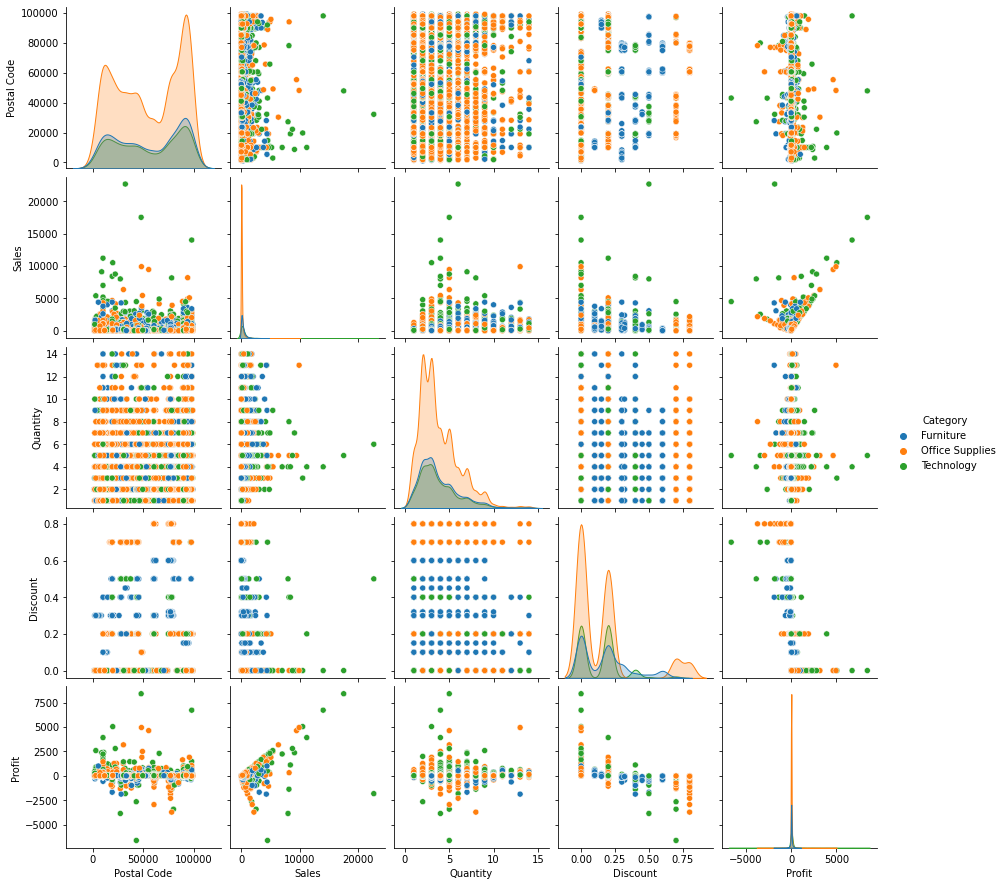

In [26]:
sns.pairplot(store_data,hue='Category')

# [2] Based on Region

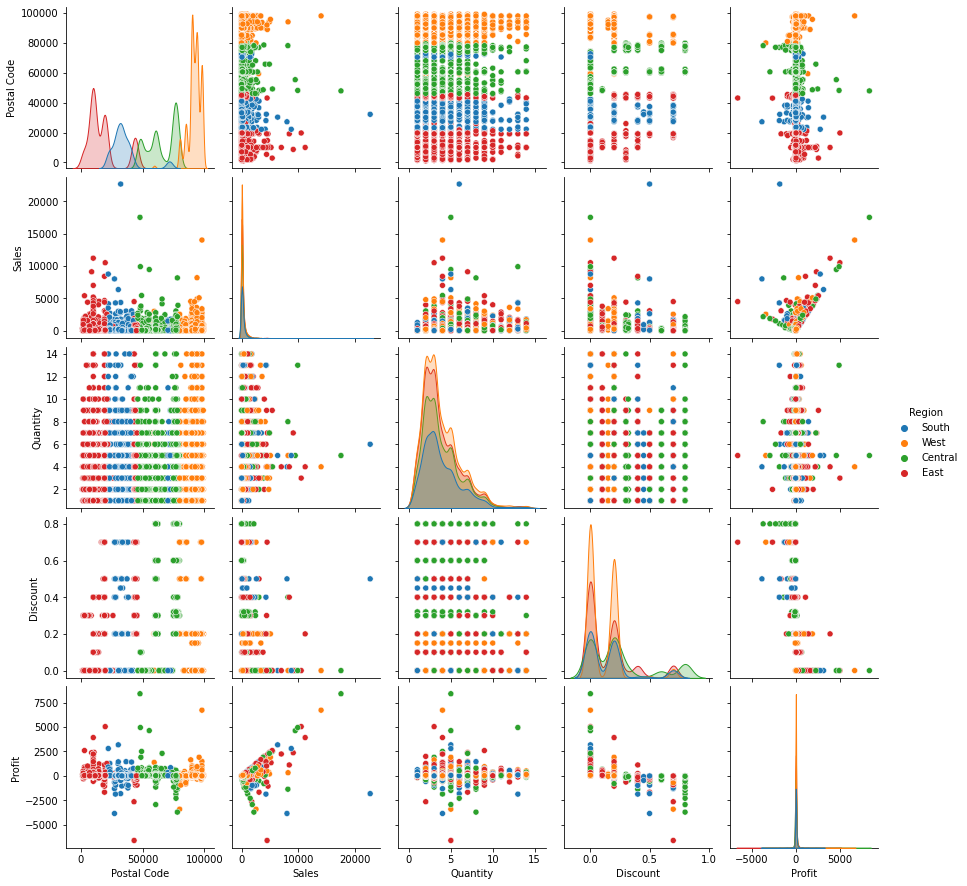

In [27]:
sns.pairplot(store_data,hue='Region')

#  [3]Based on the segment

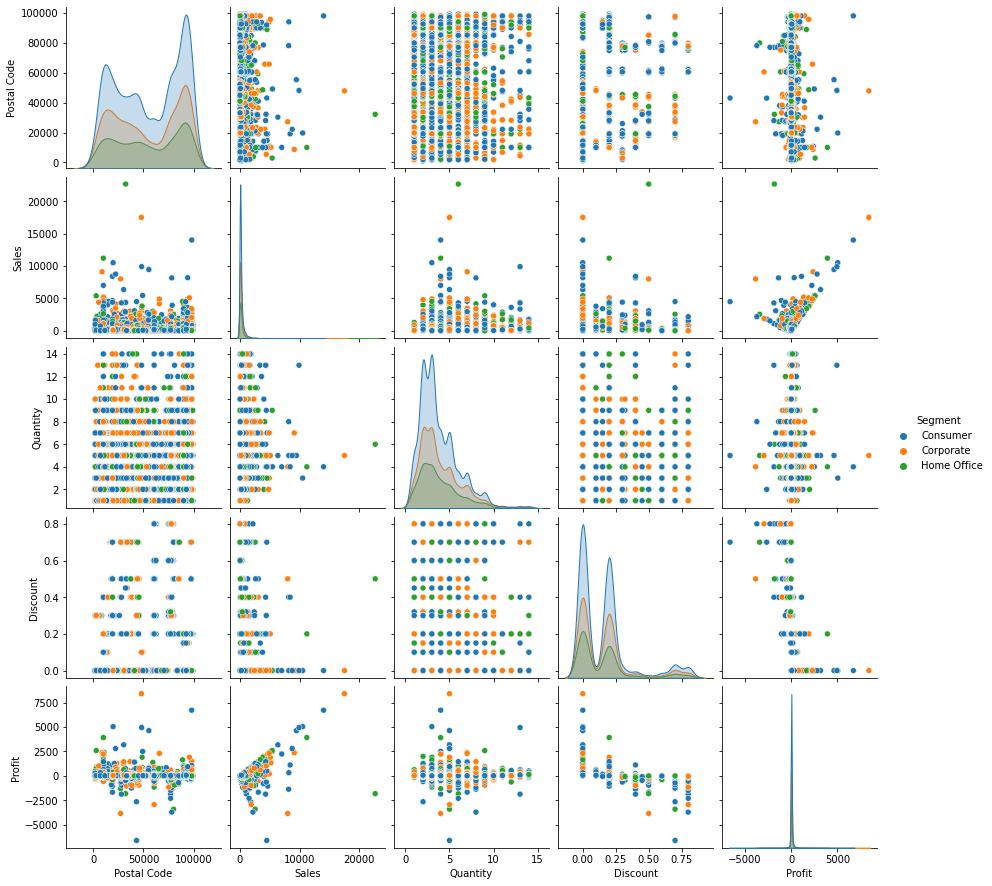

In [28]:
sns.pairplot(store_data,hue='Segment')

In [29]:
store_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# HeatMap for Correlation

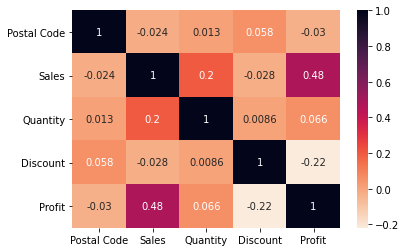

In [30]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

From above Heatmap:



1.   Sales and Profit are Moderately Correlated
2.   Discount and Profit are Negatively Correlated
3.   Quantity and Profit are less Moderately Correlated



# Most of the categories belong to Office Supplies in Supermart & 20-25% belong to furniture and Technology

In [32]:
store_data.pivot_table(values='Sales', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [33]:
store_data.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328



It can be seen from the above plot that , For Discount more then 30%,the superstore was going on loss and for Items having discount b/w 0 to 20%, the sales of superstore was average and Moreover it was gaining Profit to some extena as depicted in this pivot table.

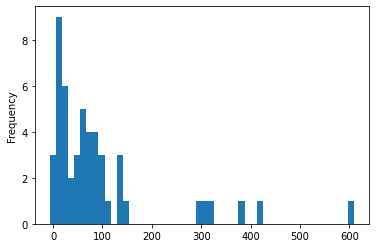

In [34]:
temp_df = store_data.loc[(store_data['Segment']=='Consumer')&(store_data['Discount']==0.1)]
temp_df['Profit'].plot.hist(bins=50)

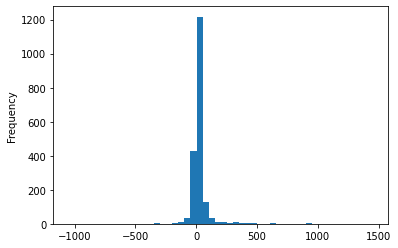

In [35]:
temp_df = store_data.loc[(store_data['Segment']=='Consumer')&(store_data['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

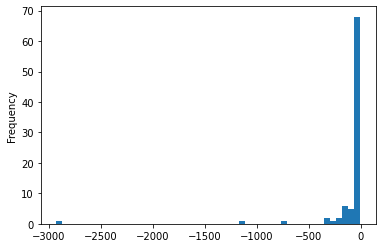

In [36]:
temp_df = store_data.loc[(store_data['Segment']=='Corporate')&(store_data['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

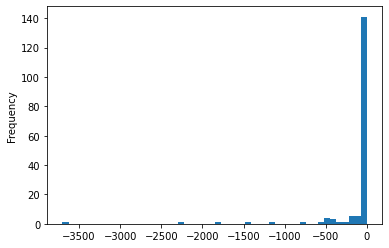

In [37]:
temp_df = store_data.loc[(store_data['Segment']=='Consumer')&(store_data['Discount']==0.8)]
temp_df['Profit'].plot.hist(bins=50)

For all the segments,when superstore is offering discount less then 40%,Its going on Profit as depicted by above graphs and if Discount >50% like we have taken discount=80%, superstore is going on loss

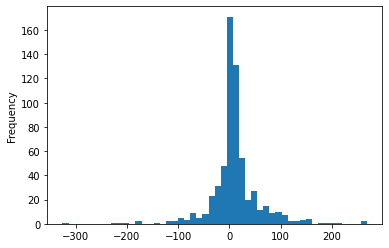

In [38]:
temp_df = df.loc[(store_data['Category']=='Furniture')&(store_data['Discount']==0.2)]
temp_df['Profit'].plot.hist(bins=50)

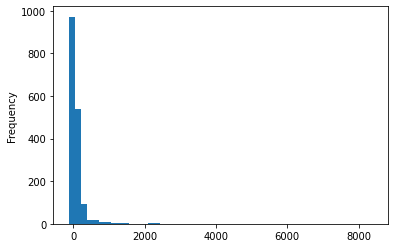

In [39]:
temp_df = df.loc[(store_data['Category']=='Technology')&(store_data['Discount']<=0.3)]
temp_df['Profit'].plot.hist(bins=50)

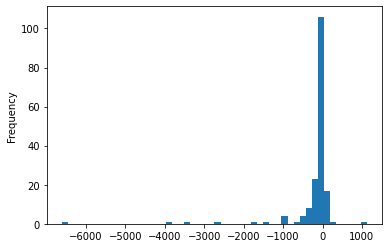

In [40]:
temp_df = df.loc[(store_data['Category']=='Technology')&(store_data['Discount']>=0.3)]
temp_df['Profit'].plot.hist(bins=50)

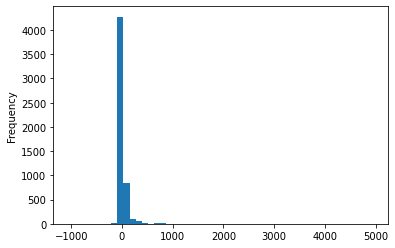

In [41]:
temp_df = df.loc[(store_data['Category']=='Office Supplies')&(store_data['Discount']<=0.3)]
temp_df['Profit'].plot.hist(bins=50)

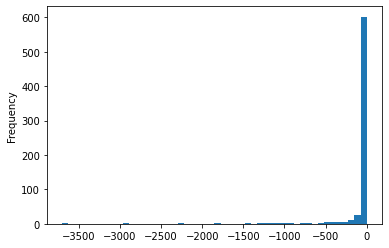

In [42]:
temp_df = df.loc[(store_data['Category']=='Office Supplies')&(store_data['Discount']>=0.3)]
temp_df['Profit'].plot.hist(bins=50)


When Discount<=30% in items ,Sales was going into Profit and When Discount>=30% in items ,Superstore is experiencing a huge loss

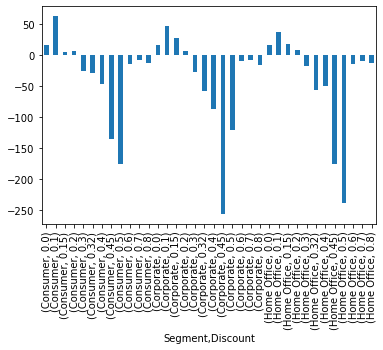

In [43]:
temp = store_data.groupby(['Segment', 'Discount']).Profit.median()
temp.plot(kind = 'bar', stacked = True)

Concluding the Analysis:-
1.  profit Percentage is more than that of sales but in some cases its vice-versa.
2.  Sales and Profit are Moderately Correlated.
3.  Discount and Profit are Negatively Correlated.
4.  Sales is high for Same day ship.
5.  New York city has the highest city wise dealings.




West region shows more sales and more profit whereas central region shows least sales and profits. So, one should try to increase sales and profits in central region. Profit percentage can be increased in some cases than sales. The loss in subcategories can be converted into profit percentage.

THANK YOU !!